In [11]:
# 9. 4~6월 감염 경로 파이, 바그래프
# 4~6월 서울, 경기지역, 6월 30일 기준, 감염 경로 파이, 바그래프
# 서울, 경기지역의 감염경로 확인 가능

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint as pp
from inspect import signature as sig
import seaborn as sns

In [13]:
case = pd.read_csv('./DataScienceforCOVID19/Case.csv')
patientInfo = pd.read_csv('./DataScienceforCOVID19/PatientInfo.csv')

In [14]:
# 4월 1일 이후 서울, 경기 환자정보

patientInfo_seoul_april = patientInfo[
                        (patientInfo.province.isin(['Gyeonggi-do','Seoul'])) &
                        (patientInfo.confirmed_date >= '2020-04-01') ]
patientInfo_seoul_april

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
476,1000000477,female,30s,Korea,Seoul,Dongdaemun-gu,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
477,1000000478,male,40s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
478,1000000479,male,30s,Korea,Seoul,etc,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
479,1000000480,female,30s,Korea,Seoul,etc,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
480,1000000481,female,0s,Korea,Seoul,etc,overseas inflow,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2000001203,NaN,NaN,Korea,Gyeonggi-do,Siheung-si,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
3416,2000001204,NaN,NaN,Korea,Gyeonggi-do,Goyang-si,contact with patient,2000001142,NaN,NaN,2020-06-29,NaN,NaN,isolated
3417,2000001205,NaN,NaN,Korea,Gyeonggi-do,Siheung-si,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
3418,2000001206,NaN,NaN,Korea,Gyeonggi-do,Bucheon-si,etc,NaN,NaN,2020-06-24,2020-06-29,NaN,NaN,isolated


In [15]:
# 5월 1일 이후 서울, 경기 환자정보

patientInfo_seoul_may = patientInfo[
                        (patientInfo.province.isin(['Gyeonggi-do','Seoul'])) &
                        (patientInfo.confirmed_date >= '2020-05-01') ]
patientInfo_seoul_may

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
634,1000000635,NaN,NaN,Korea,Seoul,Seongdong-gu,overseas inflow,NaN,NaN,NaN,2020-05-01,NaN,NaN,released
635,1000000636,NaN,NaN,Korea,Seoul,Yongsan-gu,overseas inflow,NaN,NaN,NaN,2020-05-02,NaN,NaN,released
636,1000000637,NaN,NaN,Korea,Seoul,Gangdong-gu,overseas inflow,NaN,NaN,NaN,2020-05-05,NaN,NaN,released
637,1000000638,NaN,NaN,Korea,Seoul,Jongno-gu,Itaewon Clubs,NaN,NaN,NaN,2020-05-08,NaN,NaN,released
638,1000000639,NaN,NaN,Korea,Seoul,Yongsan-gu,Itaewon Clubs,NaN,NaN,NaN,2020-05-08,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2000001203,NaN,NaN,Korea,Gyeonggi-do,Siheung-si,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
3416,2000001204,NaN,NaN,Korea,Gyeonggi-do,Goyang-si,contact with patient,2000001142,NaN,NaN,2020-06-29,NaN,NaN,isolated
3417,2000001205,NaN,NaN,Korea,Gyeonggi-do,Siheung-si,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
3418,2000001206,NaN,NaN,Korea,Gyeonggi-do,Bucheon-si,etc,NaN,NaN,2020-06-24,2020-06-29,NaN,NaN,isolated


In [16]:
# 6월 1일 이후 서울, 경기 환자정보

patientInfo_seoul_june = patientInfo[
                        (patientInfo.province.isin(['Gyeonggi-do','Seoul'])) &
                        (patientInfo.confirmed_date >= '2020-06-01') ]
patientInfo_seoul_june

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
862,1000000863,male,10s,Korea,Seoul,Yangcheon-gu,overseas inflow,NaN,NaN,NaN,2020-06-01,NaN,NaN,released
863,1000000864,female,60s,Korea,Seoul,Gangseo-gu,SMR Newly Planted Churches Group,NaN,NaN,NaN,2020-06-01,NaN,NaN,released
864,1000000865,male,50s,Korea,Seoul,Gangseo-gu,SMR Newly Planted Churches Group,NaN,NaN,NaN,2020-06-01,NaN,NaN,isolated
865,1000000866,NaN,NaN,Korea,Seoul,Yeongdeungpo-gu,SMR Newly Planted Churches Group,NaN,NaN,NaN,2020-06-01,NaN,NaN,released
866,1000000867,NaN,NaN,Korea,Seoul,Yeongdeungpo-gu,NaN,NaN,NaN,NaN,2020-06-01,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2000001203,NaN,NaN,Korea,Gyeonggi-do,Siheung-si,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
3416,2000001204,NaN,NaN,Korea,Gyeonggi-do,Goyang-si,contact with patient,2000001142,NaN,NaN,2020-06-29,NaN,NaN,isolated
3417,2000001205,NaN,NaN,Korea,Gyeonggi-do,Siheung-si,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
3418,2000001206,NaN,NaN,Korea,Gyeonggi-do,Bucheon-si,etc,NaN,NaN,2020-06-24,2020-06-29,NaN,NaN,isolated


In [17]:
# 4월 서울/경기 환자 감염사례 별 확진자수 (내림차순)
confirmed_seoul_april = patientInfo_seoul_april.groupby('infection_case')['patient_id'].count().sort_values(ascending=False).head(10)
confirmed_seoul_april

# 5월 서울/경기 환자 감염사례 별 확진자수 (내림차순)
confirmed_seoul_may = patientInfo_seoul_may.groupby('infection_case')['infection_case'].count().sort_values(ascending=False).head(10)

# # 6월 서울/경기 환자 감염사례 별 확진자수 (내림차순)
confirmed_seoul_june = patientInfo_seoul_june.groupby('infection_case')['patient_id'].count().sort_values(ascending=False).head(10)

In [18]:
pp (confirmed_seoul_april)
pp (confirmed_seoul_may)
pp (confirmed_seoul_june)

infection_case
contact with patient                513
overseas inflow                     307
Itaewon Clubs                       151
Richway                             124
etc                                  85
Coupang Logistics Center             48
Yangcheon Table Tennis Club          44
Day Care Center                      43
SMR Newly Planted Churches Group     36
Wangsung Church                      24
Name: patient_id, dtype: int64
infection_case
contact with patient                384
Itaewon Clubs                       151
overseas inflow                     127
Richway                             124
etc                                  62
Coupang Logistics Center             48
Yangcheon Table Tennis Club          44
Day Care Center                      43
SMR Newly Planted Churches Group     36
Wangsung Church                      24
Name: infection_case, dtype: int64
infection_case
contact with patient                278
Richway                             124
overseas 

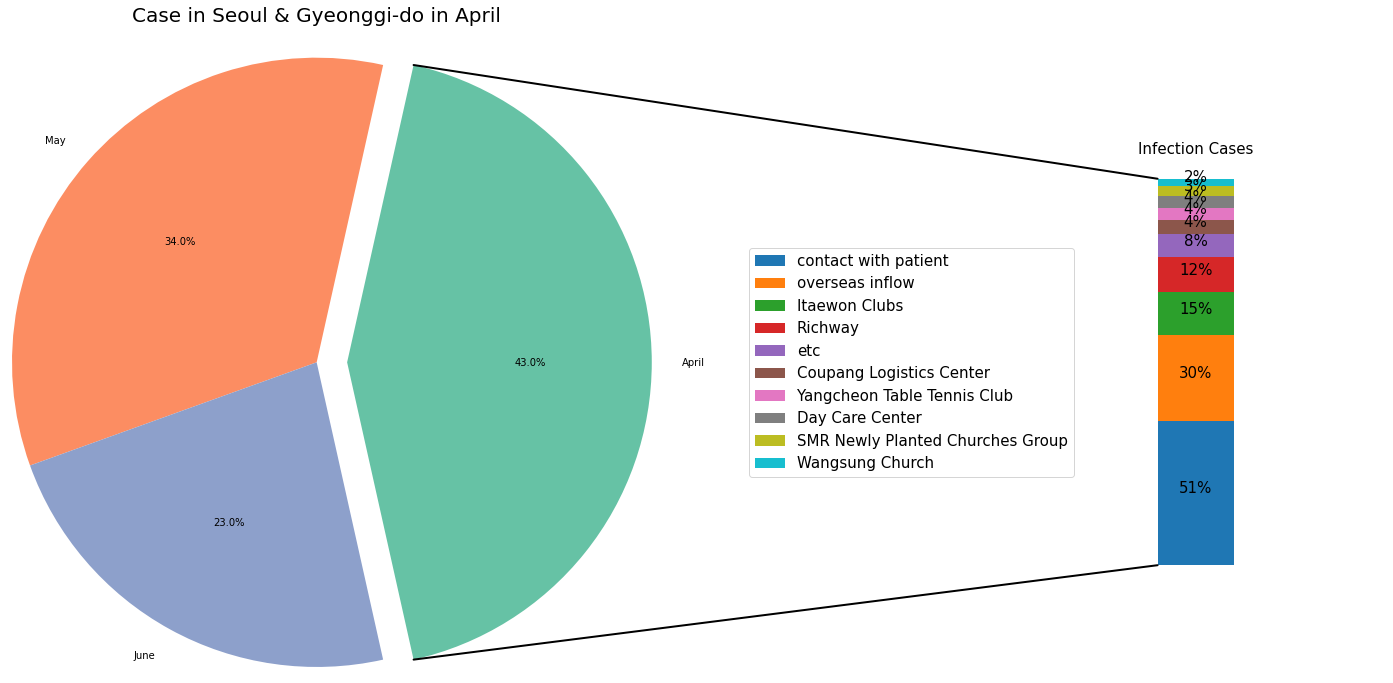

In [19]:
# 4월 서울경기지역 확진자 비율 Bar of Pie

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

frame = plt.figure(figsize = (20, 10))
pie1 = frame.add_subplot(1, 2, 1)
bar1 = frame.add_subplot(1, 2, 2)


# pie1 chart parameters
ratios = [.43 , .34 , .23]
labels = ['April', 'May', 'June' ]


angle1 = - (360* ratios[0])/2
angle2 = - ((360 * ratios[0])+ (360* ratios[1])/2)
angle3 = - ((360 * ratios[0]) + (360* ratios[1])+ (360* ratios[2])/2)

 
pie1.pie(ratios, autopct='%1.1f%%', startangle= angle1, labels=labels, counterclock = True, radius = 2, explode = (0.2, 0, 0) , colors = sns.color_palette("Set2"))
pie1.set_title("Case in Seoul & Gyeonggi-do in April", fontdict={ 'fontsize' : 20 } , pad= 150)



# -------------------------------------------------------------- # 


# bar1 chart parameters

xpos = 0
bottom = 0
ratios = confirmed_seoul_april.values
width = .5
legend_date = confirmed_seoul_april.index


for j in range(len(ratios)):
    height = ratios[j]
    bar1.bar(xpos, height, width, bottom = bottom, align='center')
    ypos = bottom + bar1.patches[j].get_height() / 2
    bottom += height
    bar1.text(xpos, ypos, "%d%%" % (bar1.patches[j].get_height() * .1),
             ha='center' , fontsize = 15 )

bar1.set_title('Infection Cases' , fontsize = 15 )
bar1.axis('off')
bar1.set_xlim(- 2.5 * width, 2.5 * width)
bar1.legend(confirmed_seoul_april.index, loc = 'center right', bbox_to_anchor=(0.2, 0.5), fontsize = 15)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = pie1.patches[0].theta1, pie1.patches[0].theta2
center, r = pie1.patches[0].center, pie1.patches[0].r
bar_height = sum([item.get_height() for item in bar1.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r* np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=bar1.transData,
                      xyB=(x, y), coordsB=pie1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
bar1.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r* np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=bar1.transData,
                      xyB=(x, y), coordsB=pie1.transData)
con.set_color([0, 0, 0])
bar1.add_artist(con)
con.set_linewidth(2)



plt.tight_layout()
plt.savefig('Case in Seoul & Gyeonggi-do in April' , bbox_inches='tight')


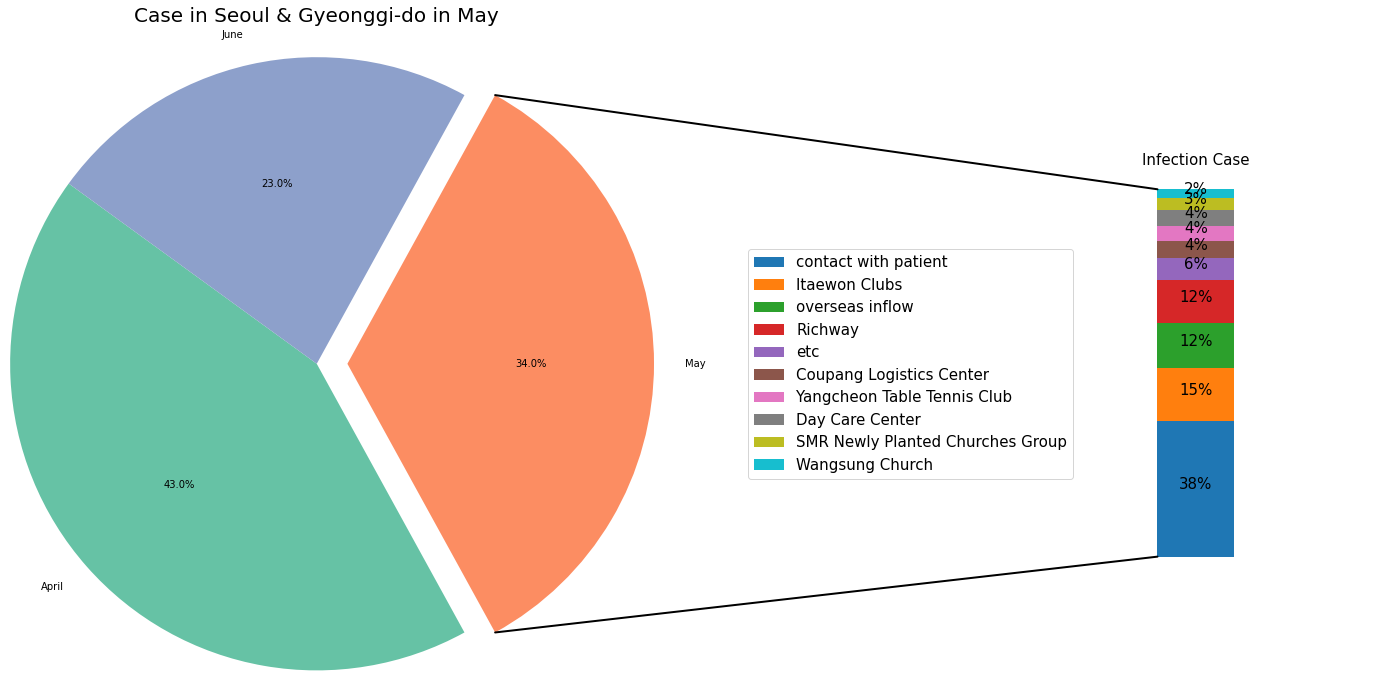

In [20]:
# 5월 서울경기지역 확진자 비율 Bar of Pie 그리기


frame = plt.figure(figsize = (20, 10))
pie2 = frame.add_subplot(1, 2, 1)
bar2 = frame.add_subplot(1, 2, 2)


# pie2 chart parameters
ratios = [.43 , .34 , .23]
labels = ['April', 'May', 'June' ]


angle1 = - (360* ratios[0])/2
angle2 = - ((360 * ratios[0])+ (360* ratios[1])/2)
angle3 = - ((360 * ratios[0]) + (360* ratios[1])+ (360* ratios[2])/2)


# 파이 그리기

pie2.pie(ratios, autopct='%1.1f%%', startangle= angle2, labels=labels, counterclock = True, radius = 2, explode = (0, 0.2, 0) , colors = sns.color_palette("Set2") )
pie2.set_title("Case in Seoul & Gyeonggi-do in May", fontdict={ 'fontsize' : 20 } , pad= 150)


# bar2 parameters

xpos = 0
bottom = 0
ratios = confirmed_seoul_may.values
width = .2


for j in range(len(ratios)):
    height = ratios[j]
    bar2.bar(xpos, height, width, bottom=bottom, align='center')
    ypos = bottom + bar2.patches[j].get_height() / 2
    bottom += height
    bar2.text(xpos, ypos, "%d%%" % (bar2.patches[j].get_height() * .1),
             ha='center' , fontsize = 15)

bar2.set_title('Infection Case' , fontsize = 15)
bar2.axis('off')
bar2.set_xlim(- 2.5 * width, 2.5 * width)
bar2.legend(confirmed_seoul_may.index, loc = 'center right', bbox_to_anchor=(0.2, 0.5), fontsize = 15)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = pie2.patches[1].theta1, pie2.patches[1].theta2
center, r = pie2.patches[1].center, pie2.patches[1].r
bar_height = sum([item.get_height() for item in bar2.patches])


# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r* np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=bar2.transData,
                      xyB=(x, y), coordsB=pie2.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
bar2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r* np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=bar2.transData,
                      xyB=(x, y), coordsB=pie2.transData)
con.set_color([0, 0, 0])
bar2.add_artist(con)
con.set_linewidth(2)



plt.tight_layout()
plt.savefig('Case in Seoul & Gyeonggi-do in May' , bbox_inches='tight')

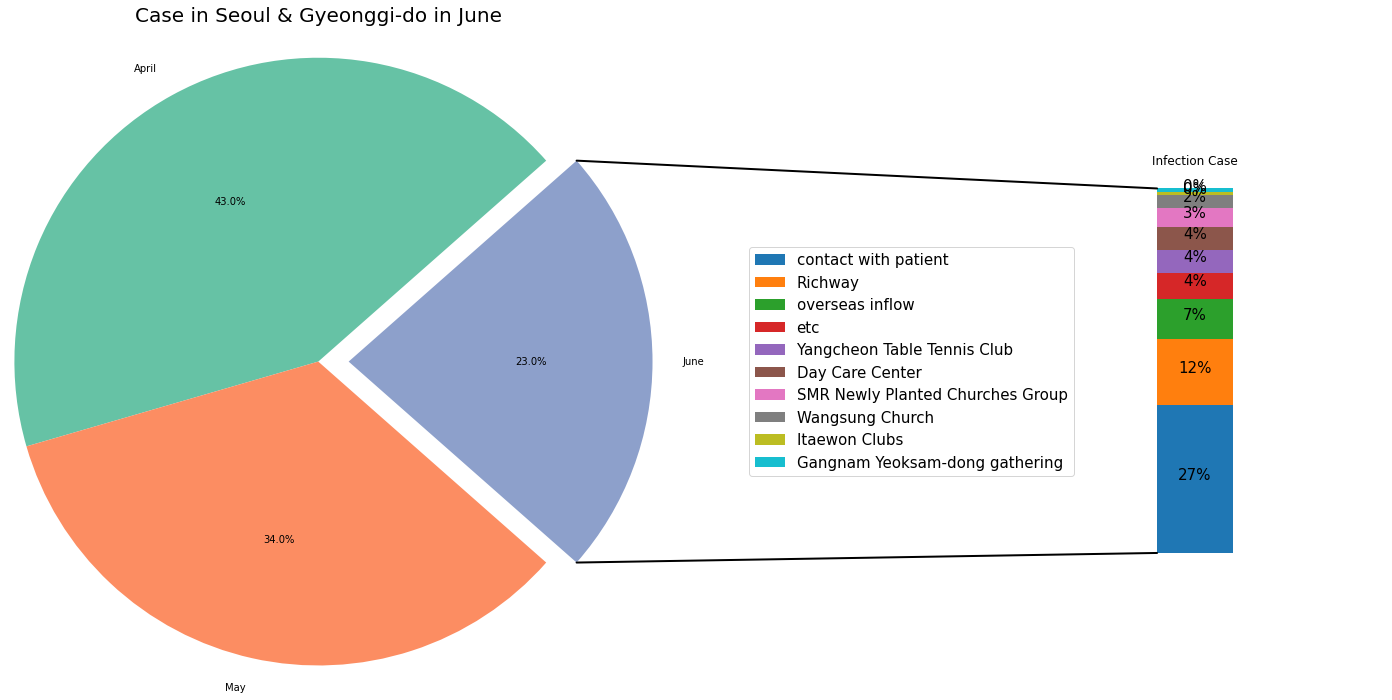

In [21]:
# 6월 서울경기지역 확진자 비율 Bar of Pie 그리기


frame = plt.figure(figsize = (20, 10))
pie3 = frame.add_subplot(1, 2, 1)
bar3 = frame.add_subplot(1, 2, 2)


ratios = [.43 , .34 , .23]
labels = ['April', 'May', 'June' ]

angle1 = - (360* ratios[0])/2
angle2 = - ((360 * ratios[0])+ (360* ratios[1])/2)
angle3 = - ((360 * ratios[0]) + (360* ratios[1])+ (360* ratios[2])/2)


# 파이 그리기

pie3.pie(ratios, autopct='%1.1f%%', startangle= angle3, labels=labels, counterclock = True, radius = 2, explode = (0, 0, 0.2) , colors = sns.color_palette("Set2"))
pie3.set_title("Case in Seoul & Gyeonggi-do in June", fontdict={ 'fontsize' : 20 } , pad= 150)



# 바 그리기

xpos = 0
bottom = 0
ratios = confirmed_seoul_june.values
width = .2


for j in range(len(ratios)):
    height = ratios[j]
    bar3.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + bar3.patches[j].get_height() / 2
    bottom += height
    bar3.text(xpos, ypos, "%d%%" % (bar3.patches[j].get_height() * .1),
             ha='center' , fontsize = 15 )

bar3.set_title('Infection Case')
bar3.axis('off')
bar3.set_xlim(- 2.5 * width, 2.5 * width)
bar3.legend(confirmed_seoul_june.index, loc = 'center right', bbox_to_anchor=(0.2, 0.5), fontsize = 15)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = pie3.patches[2].theta1, pie3.patches[2].theta2
center, r = pie3.patches[2].center, pie3.patches[2].r
bar_height = sum([item.get_height() for item in bar3.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r* np.sin(np.pi / 180 *  theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=bar3.transData,
                      xyB=(x, y), coordsB=pie3.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
bar3.add_artist(con)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r* np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=bar3.transData,
                      xyB=(x, y), coordsB=pie3.transData)
con.set_color([0, 0, 0])
bar3.add_artist(con)
con.set_linewidth(2)


plt.tight_layout()
plt.savefig('Case in Seoul & Gyeonggi-do in June' , bbox_inches='tight')